# Initial Visualization of Bank Info Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [49]:
# Replace with your local file path
path = "C:/Users/sudet/Downloads/bank_expenses.xlsx"

# Load the Excel file into a DataFrame
df = pd.read_excel(path)

# Display the first few rows and column names to understand the structure
print("Column Names:", df.columns)
print(df.head())

Column Names: Index(['Date', 'Time', 'Amount', 'Balance', 'Description', 'Category'], dtype='object')
         Date   Time   Amount   Balance  \
0  25.10.2024  23:42  -257.99  17224.27   
1  25.10.2024  19:47 -1939.95  17482.26   
2  25.10.2024  15:29   -70.00  19422.21   
3  25.10.2024  12:34   -32.00  19492.21   
4  25.10.2024  12:28   -20.00  19524.21   

                                   Description   Category  
0           046 DOLAP.COM            XXXX 6703  thrifting  
1        046 IYZICO /ZARA.COM     XXXX 6703 3D   clothing  
2           062 PIZZA RESTAURANTLARI XXXX 6703       food  
3  046 7036 İSTANBUL SABANC TEMASSIZ XXXX 6703     market  
4              7777/MBL-HAV.ALİ OSMAN TERLEMEZ      other  


In [50]:
df.shape  # Check rows and columns

(798, 6)

In [51]:
df.info()  # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         798 non-null    object 
 1   Time         798 non-null    object 
 2   Amount       798 non-null    float64
 3   Balance      798 non-null    float64
 4   Description  798 non-null    object 
 5   Category     798 non-null    object 
dtypes: float64(2), object(4)
memory usage: 37.5+ KB


In [52]:
df.describe(include='all')  # Summary statistics

,Date,Time,Amount,Balance,Description,Category
count,798,798,798.000000,798.000000,798,798
unique,390,514,NaN,NaN,197,14
top,30.09.2024,10:44,NaN,NaN,062 PIZZA RESTAURANTLARI XXXX 6703,food
freq,14,30,NaN,NaN,59,222
mean,NaN,NaN,-506.931366,9965.221065,NaN,NaN
std,NaN,NaN,1635.680691,7631.623366,NaN,NaN
min,NaN,NaN,-24000.000000,3.110000,NaN,NaN
25%,NaN,NaN,-249.750000,4837.732500,NaN,NaN
50%,NaN,NaN,-100.000000,7616.830000,NaN,NaN
75%,NaN,NaN,-40.125000,13508.330000,NaN,NaN


In [53]:
missing_data = df.isnull().sum()
print("Missing values per column:\n", missing_data)

Missing values per column:
 Date           0
Time           0
Amount         0
Balance        0
Description    0
Category       0
dtype: int64


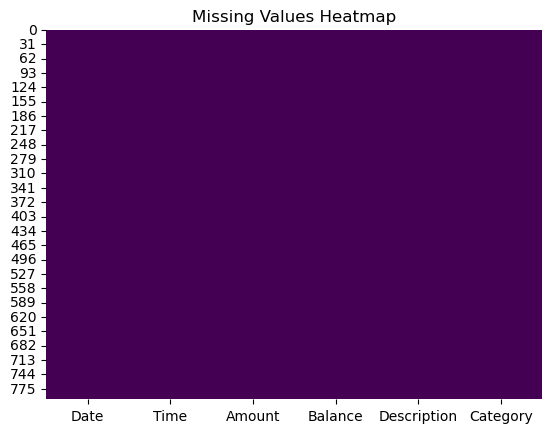

In [54]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

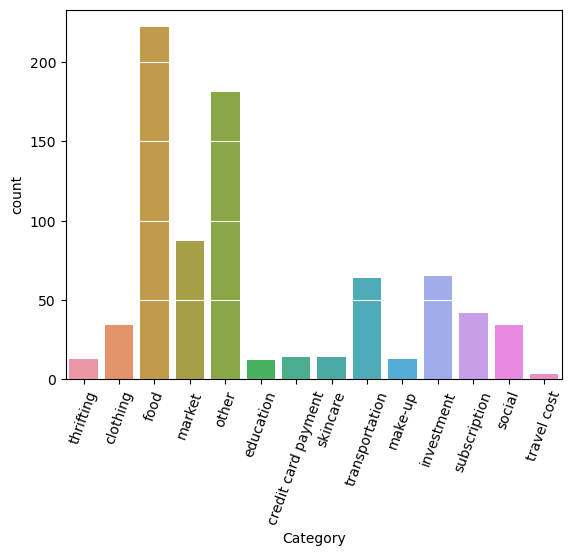

<Figure size 1000x10000 with 0 Axes>

In [55]:
sns.countplot(x="Category", data=df)
plt.grid(axis = 'y', color ='white', linestyle='-')
plt.xticks(rotation=70)
plt.figure(figsize=(10, 100))
plt.show()

In [56]:
df['Amount'] = df['Amount'] * -1
print(df.head())

         Date   Time   Amount   Balance  \
0  25.10.2024  23:42   257.99  17224.27   
1  25.10.2024  19:47  1939.95  17482.26   
2  25.10.2024  15:29    70.00  19422.21   
3  25.10.2024  12:34    32.00  19492.21   
4  25.10.2024  12:28    20.00  19524.21   

                                   Description   Category  
0           046 DOLAP.COM            XXXX 6703  thrifting  
1        046 IYZICO /ZARA.COM     XXXX 6703 3D   clothing  
2           062 PIZZA RESTAURANTLARI XXXX 6703       food  
3  046 7036 İSTANBUL SABANC TEMASSIZ XXXX 6703     market  
4              7777/MBL-HAV.ALİ OSMAN TERLEMEZ      other  


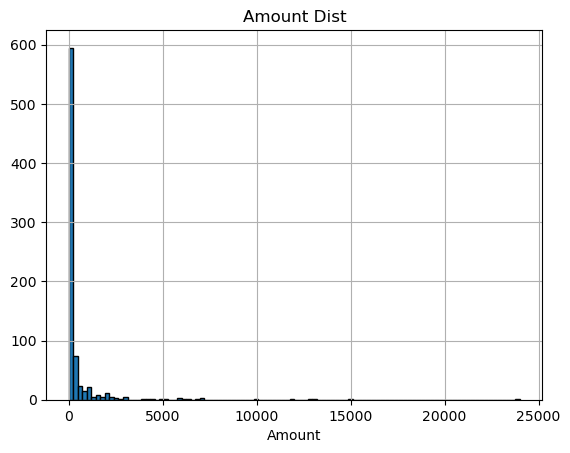

In [64]:
df['Amount'].hist(bins=100, edgecolor='black')
plt.title("Amount Dist")
plt.xlabel("Amount")
plt.show()

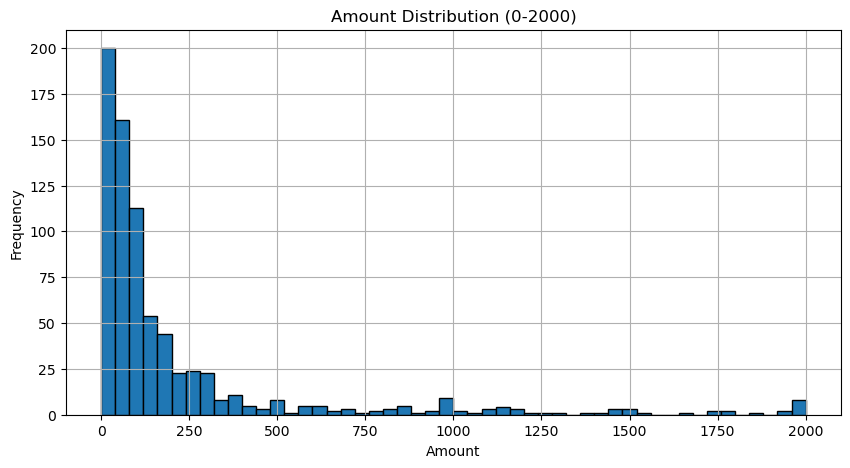

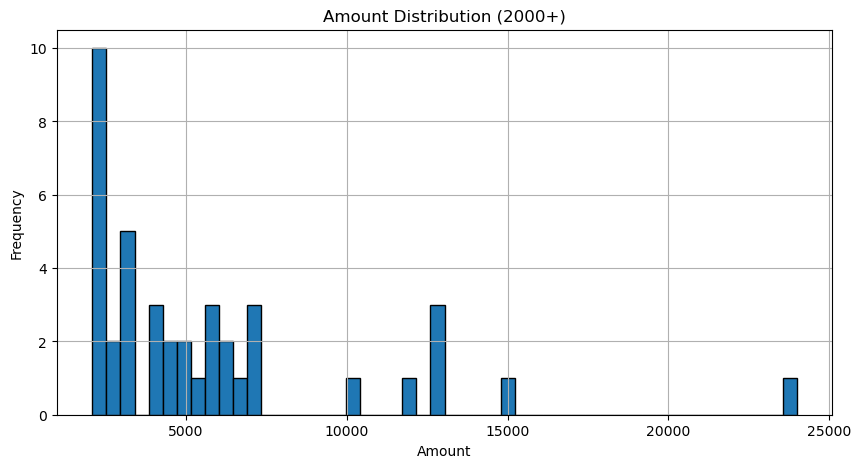

In [71]:
# Histogram for 0-2000 range
plt.figure(figsize=(10, 5))
df[df['Amount'] <= 2000]['Amount'].hist(bins=50, edgecolor='black')
plt.title("Amount Distribution (0-2000)")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Histogram for 2000+ range
plt.figure(figsize=(10, 5))
df[df['Amount'] > 2000]['Amount'].hist(bins=50, edgecolor='black')
plt.title("Amount Distribution (2000+)")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


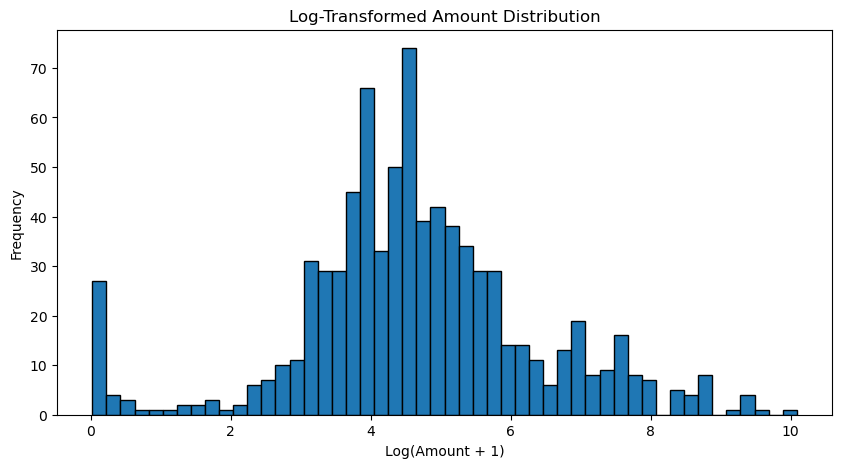

In [72]:
import numpy as np

# Apply log transformation (add 1 to avoid log(0))
log_amount = np.log1p(df['Amount'])

# Plot histogram of log-transformed data
plt.figure(figsize=(10, 5))
plt.hist(log_amount, bins=50, edgecolor='black')
plt.title("Log-Transformed Amount Distribution")
plt.xlabel("Log(Amount + 1)")
plt.ylabel("Frequency")
plt.show()


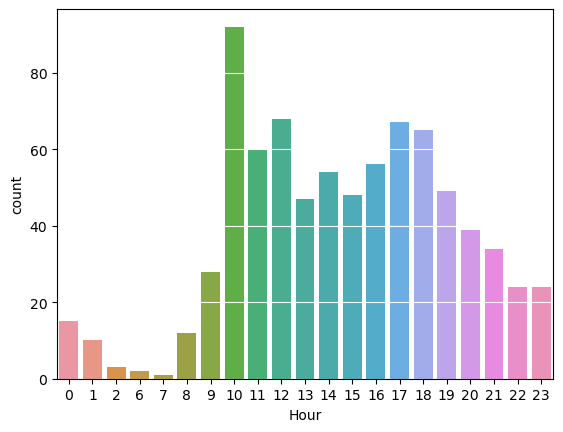

<Figure size 1000x10000 with 0 Axes>

In [84]:
# Extract the hour part from the Time column
df['Hour'] = df['Time'].str.split(':').str[0].astype(int)

sns.countplot(x="Hour", data=df)
plt.grid(axis = 'y', color ='white', linestyle='-')
plt.xticks(rotation=0)
plt.figure(figsize=(10, 100))
plt.show()

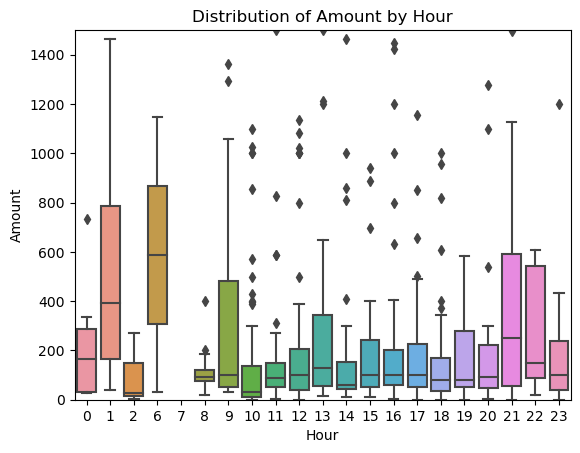

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the boxplot
sns.boxplot(x='Hour', y='Amount', data=df)

# Set the y-axis limit
plt.ylim(0, 1500)  # Adjust the limit to focus on lower values

# Add labels and title
plt.title("Distribution of Amount by Hour")
plt.xlabel("Hour")
plt.ylabel("Amount")
plt.show()
